## Exercise 


For this exercise, you will be working with the [House Price Dataset](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/code).

Please grab the train.csv file from Kaggle and explore this dataset. You need to perform explroatory data analysis and see if there is any correlation between the variables and analyze the distribution of the dataset. The question is open-ended and basically you're asked to perform EDA. 


1- Write a summary of your findings in one page (e.g., summary statistics, plots) and submit the pdf file. Therefore, for part 3 of your assignment, you need to submit at least one jupyter notebook file and one pdf file.


2- Push your code and project to github and provide the link to your code here. Ensure that your github project is organized to at least couple of main folders, ensure that you have the README file as well:

- Src
- Data
- Docs
- Results

Read this link for further info:  https://gist.github.com/ericmjl/27e50331f24db3e8f957d1fe7bbbe510





In [47]:
import seaborn as sns
import pandas as pd
import numpy as np
import os
from scipy.stats import chi2_contingency
import scipy.stats as stats
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression

### Link to my GitHub:
https://github.com/haydenchiu/housing_price_EDA

In [2]:
os.chdir(r'/Users/haydenchiu/Python Projects/CPSC4800/02 Assignments/Assignment_3 attached files Feb 20, 2023 645 PM/Housing_Price_Dataset_Analysis/Data/house-prices-advanced-regression-techniques')
#read the titanic dataset
df = pd.read_csv('train.csv')

In [45]:
#Get to know the number of columns and data types associate to them
df.info()

#Summarize the numerical columns
display(df.describe())

#check Nan values
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


/Users/haydenchiu/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


SalePrice
count    1460.000000
mean   180921.195890
std     79442.502883
min     34900.000000
25%    129975.000000
50%    163000.000000
75%    214000.000000
max    755000.000000

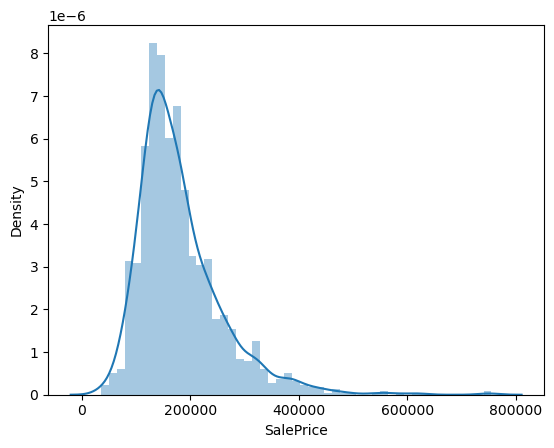

In [55]:
#check the distribution of the dependent variable
sns.distplot(df['SalePrice'])

#the housing price is very right-skewed as expected
df[['SalePrice']].describe()

<AxesSubplot:>

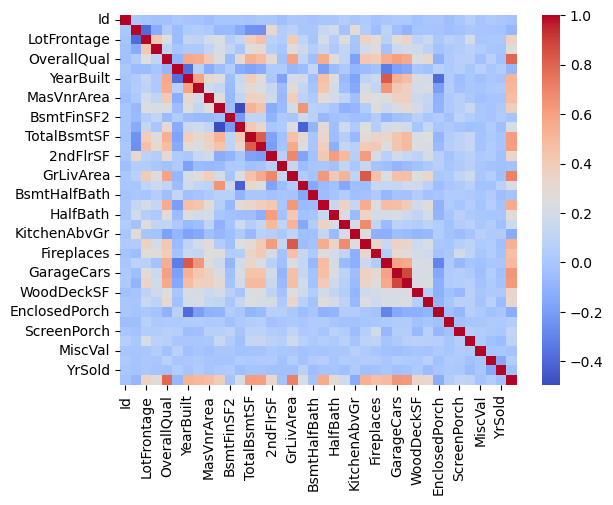

In [19]:
# display the correlation of all variables using a heatmap
corr_df = df.corr()
sns.heatmap(corr_df, cmap='coolwarm')

In [22]:
#find out which variables are highly correlated to 'SalePrice'
display(corr_df[corr_df['SalePrice']>0.7][['SalePrice']])

#Turns out 'OverallQual' and 'GrLivArea' are highly correlated to 'SalesPrice'
#OverallQual: Overall material and finish quality
#GrLivArea: Above grade (ground) living area square feet

SalePrice
OverallQual   0.790982
GrLivArea     0.708624
SalePrice     1.000000

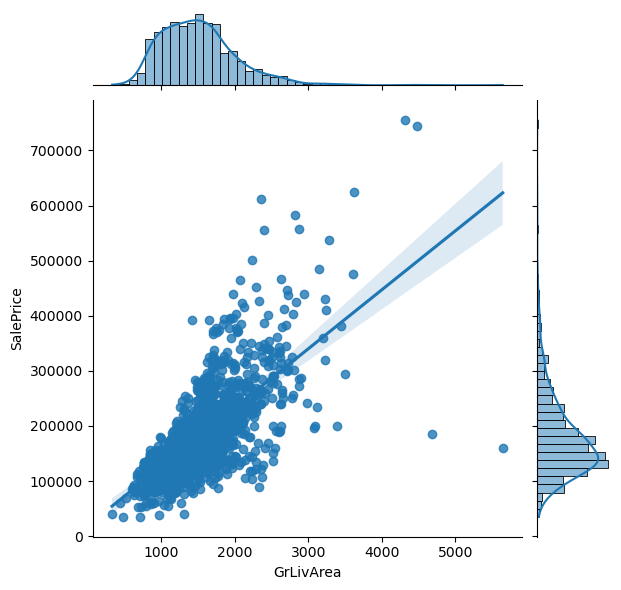

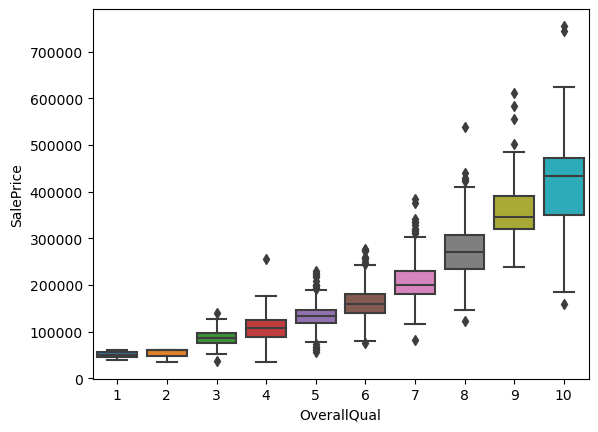

In [38]:
# Visualize the relationship between 'SalePrice' and 'GrLivArea'
sns.jointplot(x='GrLivArea', y='SalePrice', data=df, kind = 'reg')
plt.show()
# Visualize the relationship between 'SalePrice' and 'OverallQual'
sns.boxplot(x='OverallQual', y='SalePrice', data=df)
plt.show()

In [53]:
#Linear Regression on 'GrLivArea' against 'SalePrice'


# Fit the linear regression model on the training set
lm = LinearRegression()
lm.fit(df[['GrLivArea']], df['SalePrice'])

# Print the coefficients and intercept
print('Coefficients:', lm.coef_)
print('Intercept:', lm.intercept_)

# According to our linear least square fit, GrLivArea and SalePrice have the following linear relationship:

#SalePrice = 107.13*GrLivArea + 18569.03

#Meaning for every square feet of above grade (ground) living area, SalePrice goes up by 107.13 dollar.
#The interpretion of y-intercept does not make sense in this case beacuse we do not have any data with 0 GrLivArea.
display(df[df['GrLivArea']==0])
#Any interpretation of it would be extroplating the data.


Coefficients: [107.13035897]
Intercept: 18569.025856487133


Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 81 columns]